# How many unique N-mers do we have?
- n = 1: A-T; G-C (2 types)
- n = 2: 10 types (the bases of the NearestNeighbor model to calculate Tm)
- what is the general solution here?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools

from dredFISH.Utils import sequ
from dredFISH.Utils.__init__plots import *

In [2]:
def get_num_palindromic(n):
    """
    """
    if n%2 == 1: # odd
        y = 0
    else:        # even
        y = 4**int(n/2)
    return y
    
def get_num_uniq_nmer(n):
    """
    y is the number of palindromic n-mers
    """
    y = get_num_palindromic(n)
        
    return int(1/2*(4**n + y))

In [3]:
def rc(letters):
    swap = {
        'A': 'T',
        'T': 'A',
        'G': 'C',
        'C': 'G',
    }
    return tuple([swap[l] for l in letters[::-1]])

In [4]:
rc(('A', 'T'))

('A', 'T')

In [5]:
def enum_num_palindromic(n):
    i = 0
    for item in itertools.product('ACGT', repeat=n):
        if item == rc(item):
            i += 1
    return i

In [6]:
def enum_num_uniq_nmer(n):
    pool = []
    for item in itertools.product('ACGT', repeat=n):
        if item not in pool and rc(item) not in pool:
            pool.append(item)
    return len(pool)

In [7]:
ns = np.arange(1,11,)
for n in ns:
    n_plndrm = enum_num_palindromic(int(n))
    n_plndrm_theory = get_num_palindromic(int(n))
    print(n, n_plndrm, n_plndrm_theory)

1 0 0
2 4 4
3 0 0
4 16 16
5 0 0
6 64 64
7 0 0
8 256 256
9 0 0
10 1024 1024


In [8]:
ns = np.arange(1,8,)
for n in ns:
    n_unq = enum_num_uniq_nmer(int(n))
    n_unq_theory = get_num_uniq_nmer(int(n))
    print(n, n_unq, n_unq_theory)

1 2 2
2 10 10
3 32 32
4 136 136
5 512 512
6 2080 2080
7 8192 8192


In [9]:

ns = np.arange(1,20,)
df = pd.DataFrame()
df['n'] = ns
df['silly'] = np.power(4, ns)
df['ok'] = (1/2*np.power(4, ns)).astype(int)
df['exact'] = [get_num_uniq_nmer(n) for n in ns]
df

,n,silly,ok,exact
0,1,4,2,2
1,2,16,8,10
2,3,64,32,32
3,4,256,128,136
4,5,1024,512,512
5,6,4096,2048,2080
6,7,16384,8192,8192
7,8,65536,32768,32896
8,9,262144,131072,131072
9,10,1048576,524288,524800


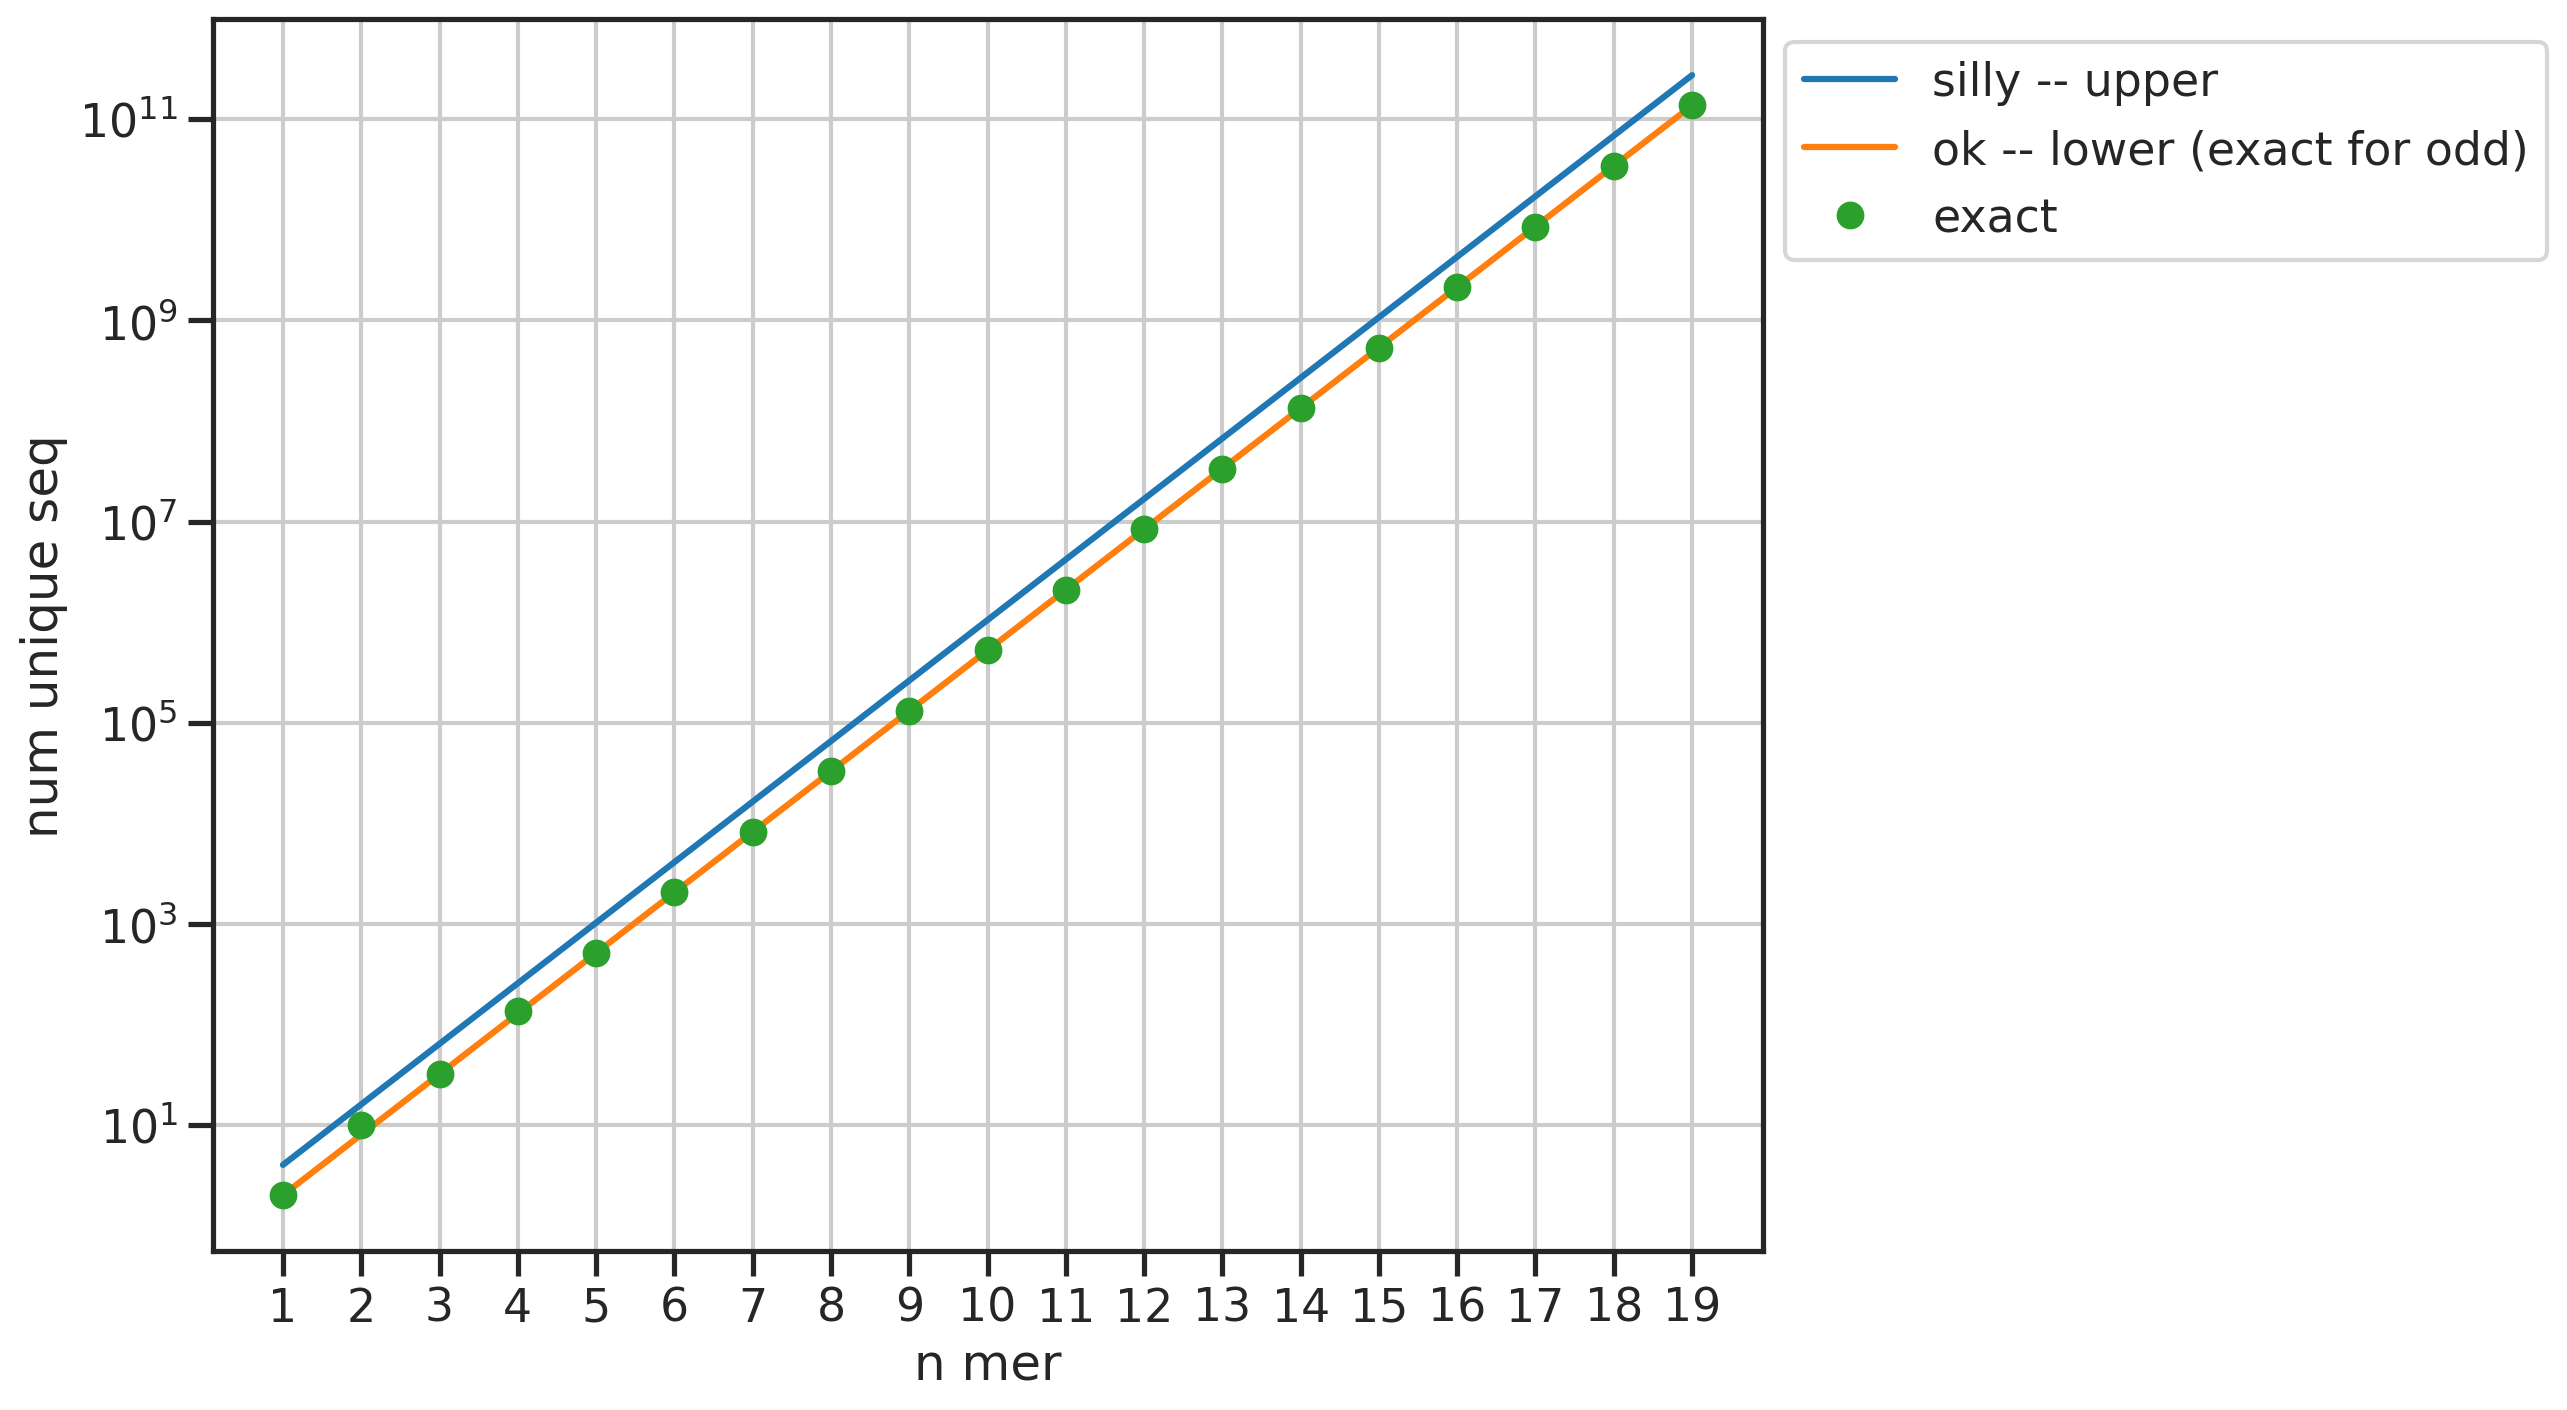

In [10]:
plt.figure(figsize=(10,8))
plt.plot(ns, np.power(4, ns), '-', label='silly -- upper')
plt.plot(ns, 1/2*np.power(4, ns), '-', label='ok -- lower (exact for odd)')
plt.plot(ns, [get_num_uniq_nmer(n) for n in ns], 'o', label='exact')
plt.xticks(ns)
plt.xlabel('n mer')
plt.ylabel('num unique seq')
plt.legend(bbox_to_anchor=(1,1))
plt.yscale('log')